In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
tweets1=pd.read_csv('/content/drive/MyDrive/tweets/TwitterDataSets/Set1/tweets(1).csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Tweets cleaning**

# **A) Removing Twitter Handles (@user) :**

In [6]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [7]:
# remove twitter handles (@user)
tweets1['tidy_tweet'] = np.vectorize(remove_pattern)(tweets1['Tweets'], "@[\w]*")

# **B) Removing Punctuations, Numbers, and Special Characters :**

In [8]:
# remove special characters, numbers, punctuations
tweets1['tidy_tweet'] = tweets1['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

# **C) Removing Short Words :**

In [9]:
tweets1['tidy_tweet'] = tweets1['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
tweets1.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,tidy_tweet
0,0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2,n#GirlsDeathInJapan n#ChildSexualAssalt n#Japa...
1,1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43,
2,2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0,rapist #moscowmitch keeps saying #rapeculture ...
3,3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43,
4,4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279,Brittany Higgins start meeting Scott Morrison ...


In [11]:
tweets1.drop(columns=['Tweets'])

,Unnamed: 0,id,lens,date,place,coordinateS,lang,source,likes,retweets,tidy_tweet
0,0,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2,n#GirlsDeathInJapan n#ChildSexualAssalt n#Japa...
1,1,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43,
2,2,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0,rapist #moscowmitch keeps saying #rapeculture ...
3,3,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43,
4,4,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279,Brittany Higgins start meeting Scott Morrison ...
...,...,...,...,...,...,...,...,...,...,...,...
5542,5542,1387965166361321474,140,2021-04-30 03:00:57,NaN,NaN,en,Twitter for iPhone,0,51,Wilson WRONG #Australia very weak nation when ...
5543,5543,1387964421603946500,144,2021-04-30 02:57:59,NaN,NaN,en,Twitter for iPhone,0,652,This article written year before ethnofascist ...
5544,5544,1387961140357910535,139,2021-04-30 02:44:57,NaN,NaN,en,Twitter for iPhone,0,515,massive #propaganda campaign underway demonize...
5545,5545,1387960389791404037,174,2021-04-30 02:41:58,NaN,NaN,en,Twitter Web App,0,0,Interestingly modern #rape typologies stem fro...


# **Tokenization :**

In [12]:
tokenized_tweet = tweets1['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [n#GirlsDeathInJapan, n#ChildSexualAssalt, n#J...
1                                                   []
2    [rapist, #moscowmitch, keeps, saying, #rapecul...
3                                                   []
4    [Brittany, Higgins, start, meeting, Scott, Mor...
Name: tidy_tweet, dtype: object

# **Stemming**

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()


0    [n#girlsdeathinjapan, n#childsexualassalt, n#j...
1                                                   []
2    [rapist, #moscowmitch, keep, say, #rapecultur,...
3                                                   []
4    [brittani, higgin, start, meet, scott, morriso...
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])



tweets1['tidy_tweet'] = tokenized_tweet

In [ ]:
tweets1.tidy_tweet

0       n#girlsdeathinjapan n#childsexualassalt n#japa...
1                                                        
2       rapist #moscowmitch keep say #rapecultur keep ...
3                                                        
4       brittani higgin start meet scott morrison made...
                              ...                        
5542    wilson wrong #australia veri weak nation when ...
5543    thi articl written year befor ethnofascist #tp...
5544    massiv #propaganda campaign underway demon #er...
5545    interestingli modern #rape typolog stem from p...
5546    massiv #propaganda campaign underway demon #er...
Name: tidy_tweet, Length: 5547, dtype: object

# **Story Generation and Visualization from Tweets :**

we will explore the cleaned tweets text.

We will answer these questions :

What are the most common words in the entire dataset?

What are the most common words in the dataset for negative and positive tweets, respectively?

How many hashtags are there in a tweet?

Which trends are associated with my dataset?

Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

# **Understanding the common words used in the tweet :**

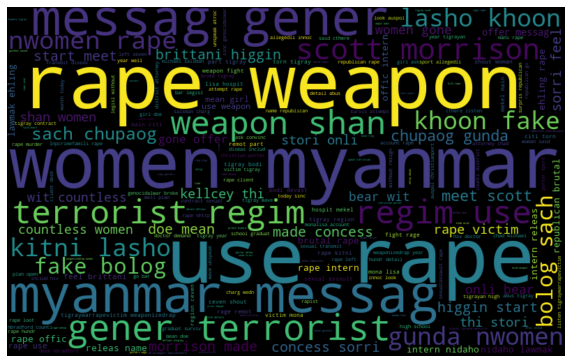

In [15]:
all_words = ' '.join([text for text in tweets1['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Sentiment Analysis :**

In [16]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 9.8MB/s 


In [17]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
tweets1['scores'] = tweets1['tidy_tweet'].apply(lambda review: sid.polarity_scores(review))

tweets1.head()


,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,tidy_tweet,scores
0,0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2,n#girlsdeathinjapan n#childsexualassalt n#japa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0,rapist #moscowmitch keep say #rapecultur keep ...,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou..."
3,3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279,brittani higgin start meet scott morrison made...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [19]:
tweets1['compound']  = tweets1['scores'].apply(lambda score_dict: score_dict['compound'])

tweets1.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,tidy_tweet,scores,compound
0,0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2,n#girlsdeathinjapan n#childsexualassalt n#japa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
2,2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0,rapist #moscowmitch keep say #rapecultur keep ...,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...",-0.7096
3,3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
4,4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279,brittani higgin start meet scott morrison made...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [79]:
tweets1['Sentiment'] = tweets1['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')

tweets1.head()


,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,tidy_tweet,scores,compound,Sentiment,label,Label
0,0,b'RT @odd_joker: #\xe6\x97\xad\xe5\xb7\x9d\xe5...,1390783063920046080,140,2021-05-07 21:38:16,NaN,NaN,und,Twitter Web App,0,2,n#girlsdeathinjapan n#childsexualassalt n#japa...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,NaN,NaN
1,1,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390782227089342464,140,2021-05-07 21:34:57,NaN,NaN,en,Twitter for Android,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,positive,NaN,NaN
2,2,b'\xe2\x81\xa6@JoeManchinWV\xe2\x81\xa9 is rap...,1390782207061544961,183,2021-05-07 21:34:52,NaN,NaN,en,Twitter for iPhone,0,0,rapist #moscowmitch keep say #rapecultur keep ...,"{'neg': 0.29, 'neu': 0.71, 'pos': 0.0, 'compou...",-0.7096,negative,1.0,1.0
3,3,b'RT @GoogleExpertUK: @JenGwenBrown @WB_UK @NH...,1390781884439859209,140,2021-05-07 21:33:35,NaN,NaN,en,Twitter Web App,0,43,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,positive,NaN,NaN
4,4,b'RT @JusticeOzzie: Ms Brittany Higgins : \xe2...,1390780006435987456,140,2021-05-07 21:26:07,NaN,NaN,en,Twitter for Android,0,279,brittani higgin start meet scott morrison made...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,NaN,NaN


In [80]:
tweets1.Sentiment.value_counts()


positive    2910
negative    2637
Name: Sentiment, dtype: int64

In [81]:
tweets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5547 entries, 0 to 5546
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   5547 non-null   int64  
 1   Tweets       5547 non-null   object 
 2   id           5547 non-null   int64  
 3   lens         5547 non-null   int64  
 4   date         5547 non-null   object 
 5   place        27 non-null     object 
 6   coordinateS  2 non-null      object 
 7   lang         5547 non-null   object 
 8   source       5547 non-null   object 
 9   likes        5547 non-null   int64  
 10  retweets     5547 non-null   int64  
 11  tidy_tweet   5547 non-null   object 
 12  scores       5547 non-null   object 
 13  compound     5547 non-null   float64
 14  Sentiment    5547 non-null   object 
 15  label        2637 non-null   float64
 16  Label        2637 non-null   float64
dtypes: float64(3), int64(5), object(9)
memory usage: 736.8+ KB


In [82]:
tweets1.Sentiment.value_counts()

positive    2910
negative    2637
Name: Sentiment, dtype: int64

In [22]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [83]:
tweets1['Label']=tweets1['Sentiment'].map({'positive':0.0,'negative':1.0})
tweets1.Label.value_counts()

0.0    2910
1.0    2637
Name: Label, dtype: int64

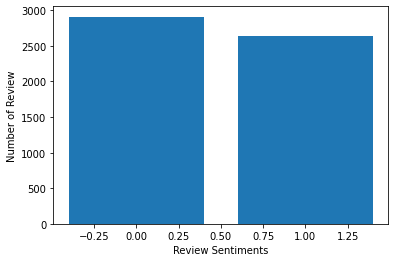

In [84]:
Sentiment_count=tweets1.groupby('Label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tidy_tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [85]:
data=tweets1[['tidy_tweet','Label']]
data.head()

,tidy_tweet,Label
0,n#girlsdeathinjapan n#childsexualassalt n#japa...,0.0
1,,0.0
2,rapist #moscowmitch keep say #rapecultur keep ...,1.0
3,,0.0
4,brittani higgin start meet scott morrison made...,0.0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5547 entries, 0 to 5546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tidy_tweet  5547 non-null   object 
 1   Label       5547 non-null   float64
dtypes: float64(1), object(1)
memory usage: 86.8+ KB


In [87]:
data.Label.astype('int64')

0       0
1       0
2       1
3       0
4       0
       ..
5542    1
5543    0
5544    0
5545    0
5546    0
Name: Label, Length: 5547, dtype: int64

In [88]:
data.Label.unique()

array([0., 1.])

First of all, splitting the data set into a training and a testing set. The test set is the 10% of the original data set.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['tidy_tweet'])

In [90]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Label'], test_size=0.2, random_state=1)


In [91]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9036036036036036


# **Visualization :**

separating the Positive and Negative tweets of the training set in order to easily visualize their contained words

In [93]:
train_pos = tweets1[ tweets1['Sentiment'] == 'positive']
train_pos = train_pos['tidy_tweet']
train_neg = tweets1[ tweets1['Sentiment'] == 'negative']
train_neg = train_neg['tidy_tweet']

In [95]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [96]:
nltk.download('stopwords')
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.tidy_tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [98]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

In [99]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Now , we are going to plot the most frequently distributed words. The most words are centered around debate nights.

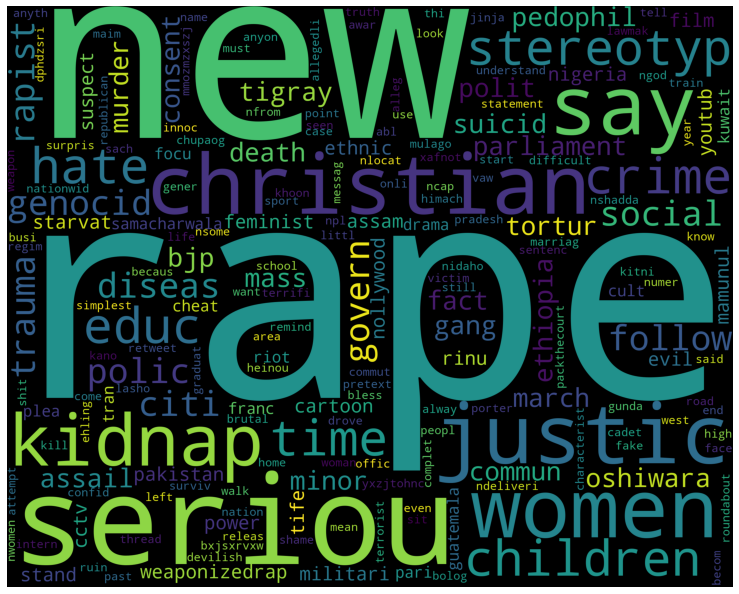

In [100]:
wordcloud_draw(w_features)